# L1 Cost Optimizer: Linear Dynamics Without Control Constraints.
#### In this notebook we reproduce the results displayed in "FAST SOLUTION OF OPTIMAL CONTROL PROBLEMS WITH L1 COST". 

Library imports.

In [1]:
using BenchmarkTools
using JLD
using LinearAlgebra
using TrajectoryOptimization
using PartedArrays
using PGFPlots
using PyPlot

Include the files from the repository.

In [2]:
include("../src/cost_function.jl")
include("../src/dynamics.jl")
include("../src/experiment.jl")
include("../src/experiment_parameters.jl")
include("../src/parameter_scaling.jl")
include("../src/solver.jl")
include("../src/test.jl")
include("../src/utils.jl")
include("../src/visualization.jl")
include("../src/visualization_latex.jl");

### Running the rendezvous example with linear dynamics and without control constraints.

Parameter definition.

In [3]:
# Set the parameters for the experiment
parameters = define_lin_unconstrained_parameters()
# Choose the parameter ρ
parameters["ρ"] = 1e-2
# Choose the stopping criterion threshold
parameters["stopping_criterion"] = 4.5e-3;

Drifting phase.

In [4]:
# Propagates the nonlinear dynamics forward
# to let the 2 satellites drift apart from each other.
x0_drifted = initial_drift(parameters)
x0_cw = full_to_reduced_state(x0_drifted) # convert R^12 (nonlinear dynamics) state to R^6 (linear dynamics)
parameters["x0"] = x0_cw;

Rescaling the parameters for numerical conditioning.

In [5]:
# Scale the parameters of the linear model
parameters = scale_lin_parameters(parameters);

Solve the L1-norm cost trajectory optimization problem.

In [6]:
# Compute the control sequence
parameters["verbose"] = false
X, U, Y, ν, cost_history, optimality_criterion, iter = l1_solver(parameters);

Number of LQR passes = 86


Display the results of the solve.

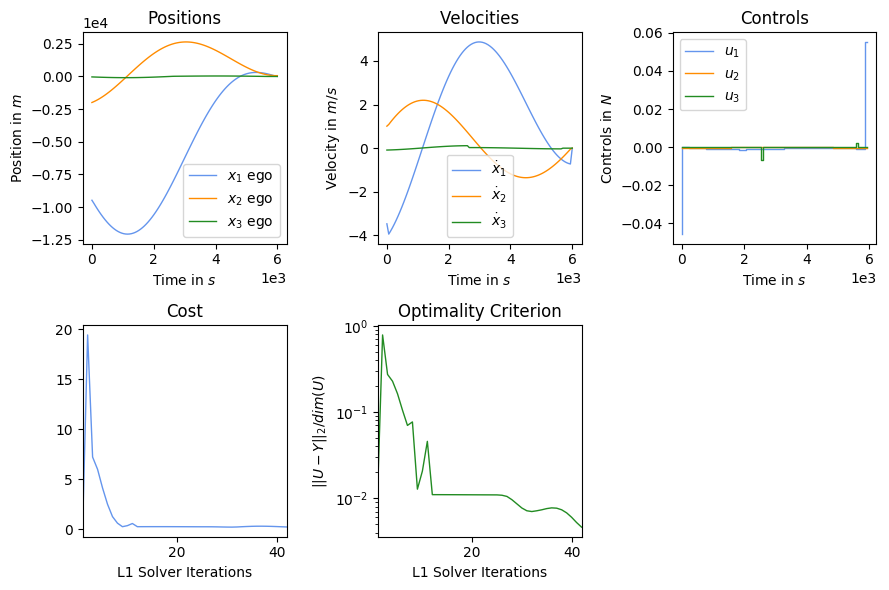

In [7]:
filename = "unconstrained_linear_dynamics"
parameters["show_result"] = true
figure = save_results_image(X, U, Y, ν, cost_history, optimality_criterion, filename, iter, parameters);